#  Loan Approval Prediction

In [1]:
#Importing all the required packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
pwd

'/Users/ankurghogale/Data Analytics Programming (Lab)/Untitled Folder/X19193866-DMML-Final Submission'

In [3]:
Loan_approval = pd.read_csv('train_values_full.csv')

In [4]:
Loan_approval.columns

Index(['row_id', 'loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex',
       'applicant_income', 'population', 'minority_population_pct',
       'ffiecmedian_family_income', 'tract_to_msa_md_income_pct',
       'number_of_owner-occupied_units', 'number_of_1_to_4_family_units',
       'lender', 'co_applicant', 'accepted'],
      dtype='object')

In [5]:
Loan_approval.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted
0,0,3,1,1,1,70,3,18,37,246,...,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,False,1
1,1,1,1,3,1,178,3,369,52,299,...,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,False,0
2,2,2,1,3,1,163,3,16,10,306,...,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,False,1
3,3,1,1,1,1,155,1,305,47,180,...,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,True,1
4,4,1,1,1,1,305,3,24,37,20,...,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,False,1


Let's do some descriptive analysis

In [6]:
Loan_approval.describe()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,accepted
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,...,500000.000000,460052.000000,477535.000000,477534.000000,477560.000000,477486.000000,477435.000000,477470.000000,500000.000000,500000.000000
mean,249999.500000,1.366276,1.047650,2.066810,1.109590,221.753158,2.764722,181.606972,23.726924,144.542062,...,1.462374,102.389521,5416.833956,31.617310,69235.603298,91.832624,1427.718282,1886.147065,3720.121344,0.500228
std,144337.711634,0.690555,0.231404,0.948371,0.326092,590.641648,0.543061,138.464169,15.982768,100.243612,...,0.677685,153.534496,2728.144999,26.333938,14810.058791,14.210924,737.559511,914.123744,1838.313175,0.500000
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,14.000000,0.534000,17858.000000,3.981000,4.000000,1.000000,0.000000,0.000000
25%,124999.750000,1.000000,1.000000,1.000000,1.000000,93.000000,3.000000,25.000000,6.000000,57.000000,...,1.000000,47.000000,3744.000000,10.700000,59731.000000,88.067250,944.000000,1301.000000,2442.000000,0.000000
50%,249999.500000,1.000000,1.000000,2.000000,1.000000,162.000000,3.000000,192.000000,26.000000,131.000000,...,1.000000,74.000000,4975.000000,22.901000,67526.000000,100.000000,1327.000000,1753.000000,3731.000000,1.000000
75%,374999.250000,2.000000,1.000000,3.000000,1.000000,266.000000,3.000000,314.000000,37.000000,246.000000,...,2.000000,117.000000,6467.000000,46.020000,75351.000000,100.000000,1780.000000,2309.000000,5436.000000,1.000000
max,499999.000000,4.000000,3.000000,3.000000,3.000000,100878.000000,3.000000,408.000000,52.000000,324.000000,...,4.000000,10139.000000,37097.000000,100.000000,125248.000000,100.000000,8771.000000,13623.000000,6508.000000,1.000000


In [7]:
#Checking datatypes of all the columns
Loan_approval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 23 columns):
row_id                            500000 non-null int64
loan_type                         500000 non-null int64
property_type                     500000 non-null int64
loan_purpose                      500000 non-null int64
occupancy                         500000 non-null int64
loan_amount                       500000 non-null int64
preapproval                       500000 non-null int64
msa_md                            500000 non-null int64
state_code                        500000 non-null int64
county_code                       500000 non-null int64
applicant_ethnicity               500000 non-null int64
applicant_race                    500000 non-null int64
applicant_sex                     500000 non-null int64
applicant_income                  460052 non-null float64
population                        477535 non-null float64
minority_population_pct           477534 non-

In [8]:
Loan_approval.head().T

,0,1,2,3,4
row_id,0,1,2,3,4
loan_type,3,1,2,1,1
property_type,1,1,1,1,1
loan_purpose,1,3,3,1,1
occupancy,1,1,1,1,1
loan_amount,70,178,163,155,305
preapproval,3,3,3,1,3
msa_md,18,369,16,305,24
state_code,37,52,10,47,37
county_code,246,299,306,180,20


The dataset shows that 'accepted' is our target variable which will show the approval and disapproval

In [9]:
Loan_approval.shape

(500000, 23)

In [10]:
#Checking the null values
Loan_approval.isnull().sum()

row_id                                0
loan_type                             0
property_type                         0
loan_purpose                          0
occupancy                             0
loan_amount                           0
preapproval                           0
msa_md                                0
state_code                            0
county_code                           0
applicant_ethnicity                   0
applicant_race                        0
applicant_sex                         0
applicant_income                  39948
population                        22465
minority_population_pct           22466
ffiecmedian_family_income         22440
tract_to_msa_md_income_pct        22514
number_of_owner-occupied_units    22565
number_of_1_to_4_family_units     22530
lender                                0
co_applicant                          0
accepted                              0
dtype: int64

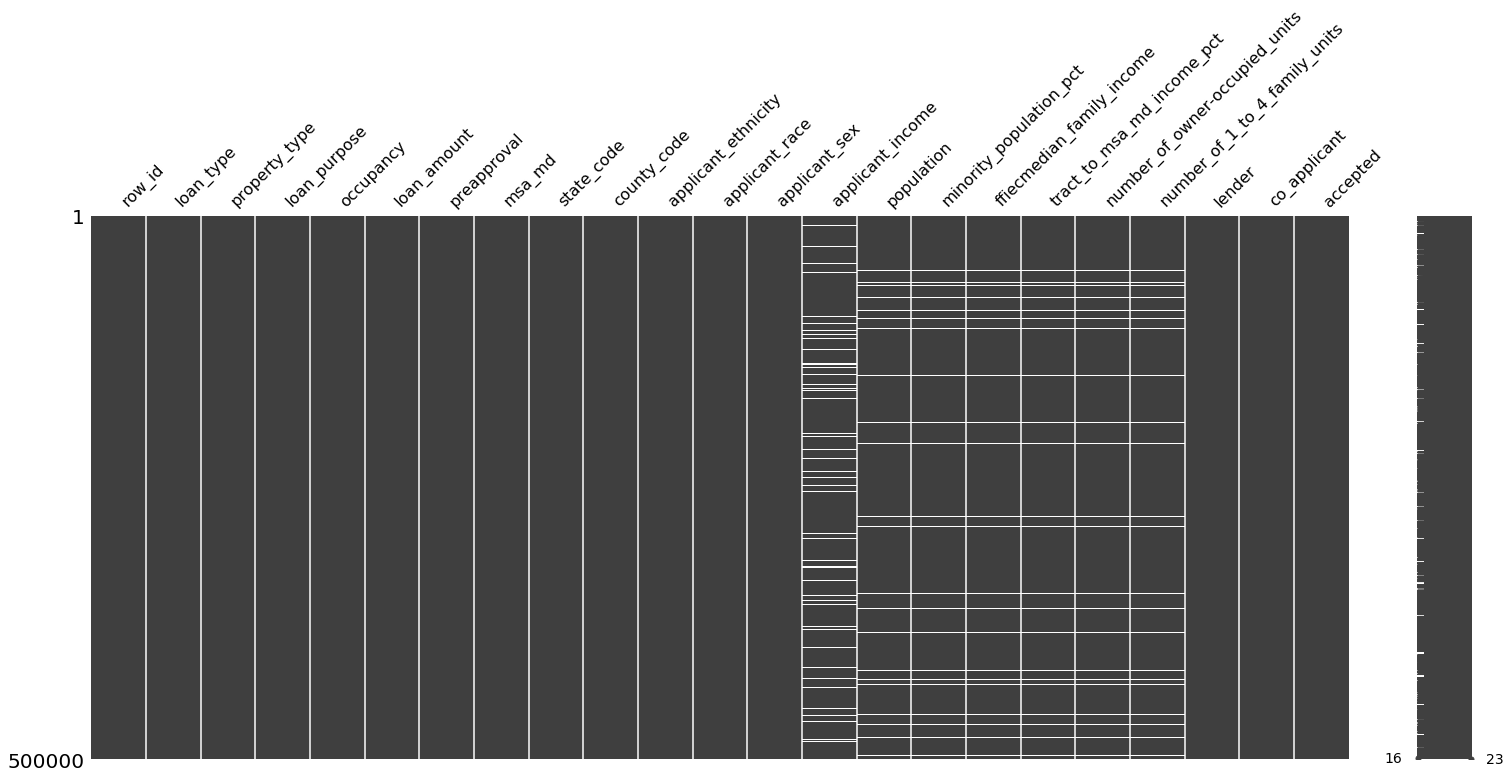

In [11]:
import missingno as msno
msno.matrix(Loan_approval)

In [12]:
Loan_approval.dropna(inplace=True)

In [13]:
Loan_approval.shape

(438255, 23)

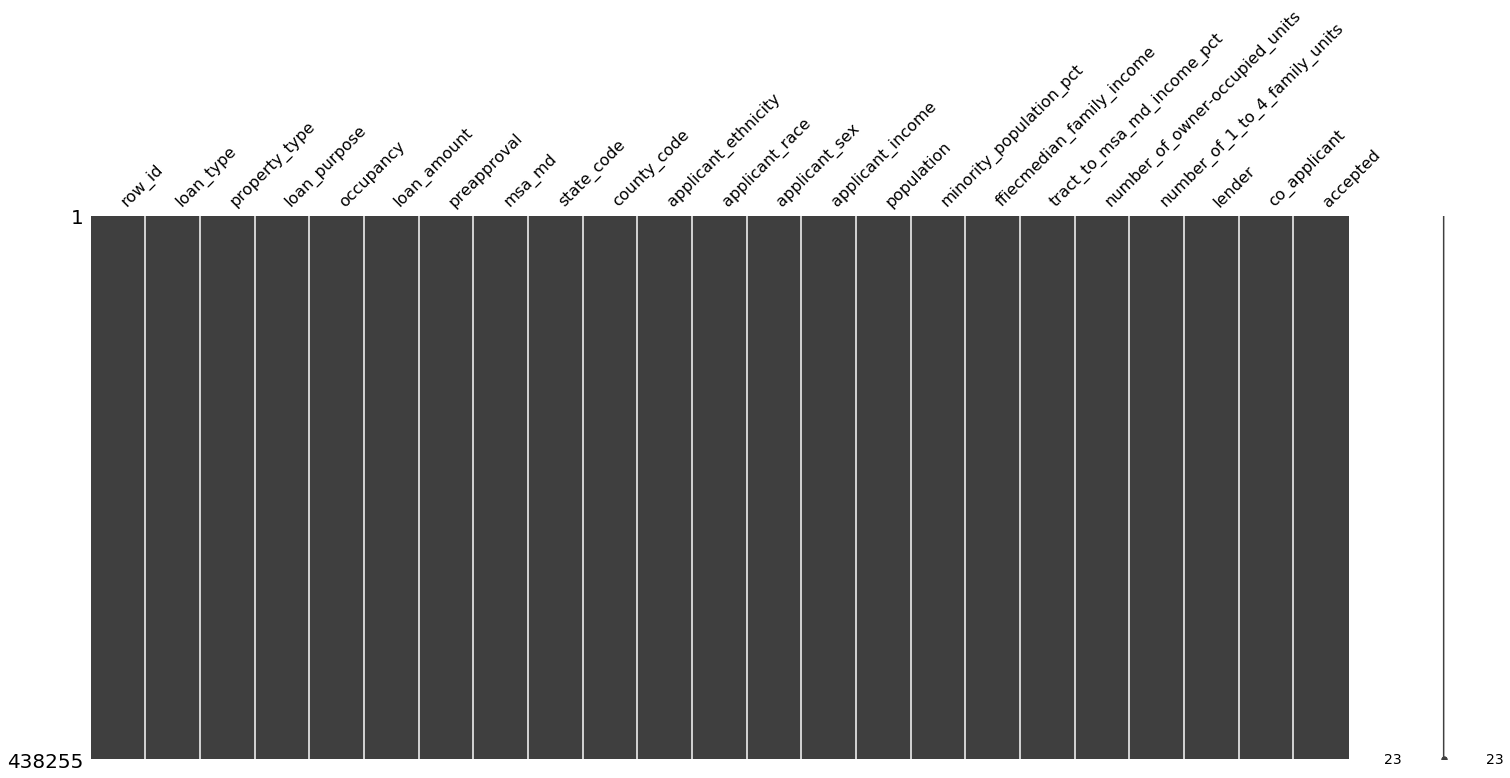

In [14]:
import missingno as msno
msno.matrix(Loan_approval)

In [15]:
#Checking categorical variables
for i in Loan_approval.columns:
    print(i)
    print(Loan_approval[i].unique())
    print('-'*40)

row_id
[     0      1      2 ... 499997 499998 499999]
----------------------------------------
loan_type
[3 1 2 4]
----------------------------------------
property_type
[1 2]
----------------------------------------
loan_purpose
[1 3 2]
----------------------------------------
occupancy
[1 2 3]
----------------------------------------
loan_amount
[  70  178  163 ... 1700 1959 2148]
----------------------------------------
preapproval
[3 1 2]
----------------------------------------
msa_md
[ 18 369  16 305  24 221 374 322 194 358 154 141 281 101 214 278 197 206
 389 333 254 175 314  91  25  -1 207 318  72  87  10 328 150  80  65 286
 380 383 311 105  74 284 344 342 218 187 351 249 162 234 352 171 217 165
  83 360 163 371 406 398 403  37 225 156 355 247  61 335 395 192  62 288
  11 109 356 387 368   2   6  48 271 385 366 205 199 189 404 402 213  96
 397 255  20  50   1  27 306 324 308  53 102 276 348  44 200 299  82 211
 373  36 177  84 116  39 350 145 391 325 184 268  88 266 139 256 3

We can see there are few categorical variables like **loan_type, property_type, loan_purpose, occupancy, preapproval, applicant_ethnicity, applicant_race, applicant_sex**

### Feature Engineering
The dataset can be divided into features to perform further analysis depending upon the fields. These features can be used to perform feature engineering. 
- **Target Feature** : 'accepted'
- **Loan Features** : 'loan_amount', 'loan_purpose', 'loan_type', 'preapproval', 'property_type'
- **Applicant Features** : 'applicant_ethnicity', 'applicant_race', 'applicant_sex', 'applicant_income'

#### Target Features

In [16]:
Loan_approval['accepted'].describe()

count    438255.000000
mean          0.520352
std           0.499586
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: accepted, dtype: float64

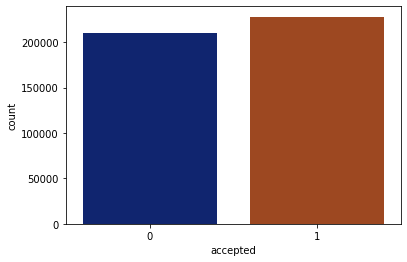

In [17]:
sns.countplot(x='accepted',data=Loan_approval, palette='dark')
plt.show();

In [18]:
Loan_approval['accepted'].value_counts()

1    228047
0    210208
Name: accepted, dtype: int64

The frequency of acceptance and rejection is almost equal

#### Loan Features:

In [19]:
#Loan Amount
#Minimum, maximum and mean loan amount
print(Loan_approval['loan_amount'].min())
print(Loan_approval['loan_amount'].max())
print(Loan_approval['loan_amount'].mean())

1
15983
209.3466224002008


In [20]:
Loan_approval['loan_amount'].nunique()

2324

In [21]:
Loan_approval['loan_amount'].unique()

array([  70,  178,  163, ..., 1700, 1959, 2148])

In [22]:
#checking frequency of amount of loan taken 
(Loan_approval['loan_amount'].value_counts()/len(Loan_approval))

10      0.009910
5       0.008251
3       0.005983
15      0.005515
20      0.005259
          ...   
1723    0.000002
2111    0.000002
2681    0.000002
2493    0.000002
1729    0.000002
Name: loan_amount, Length: 2324, dtype: float64

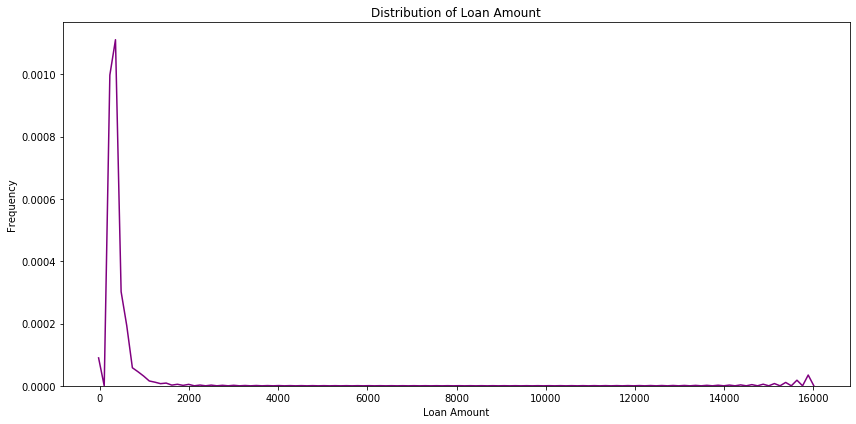

In [23]:
plt.figure(figsize=(12,6))
sns.distplot(Loan_approval['loan_amount'],hist=False,color= 'purple' )
plt.title("Distribution of Loan Amount")
plt.ylabel("Frequency")
plt.xlabel('Loan Amount')
plt.tight_layout()
plt.show()

From the graph, we can notice most of the loan amounts are between 1 to around 10000 and there are some more few with loan amount around 100000.

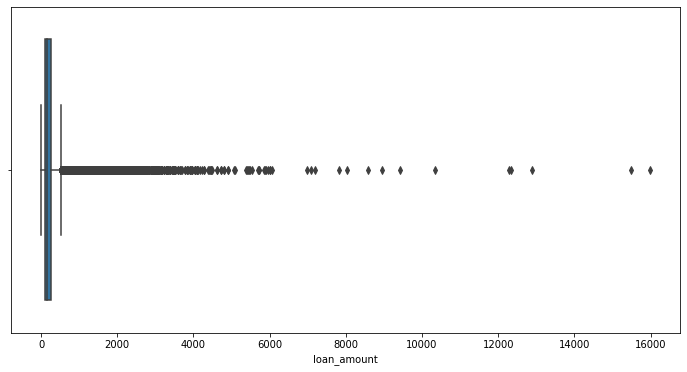

In [24]:
plt.figure(figsize=(12,6))
sns.boxplot(x=Loan_approval['loan_amount'])

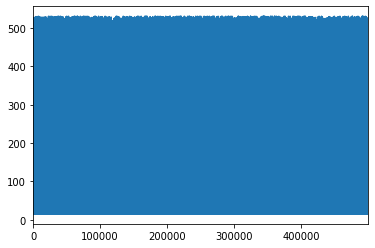

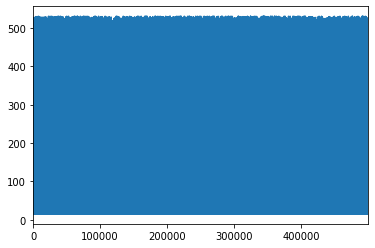

In [25]:
y = Loan_approval['loan_amount']
removed_outliers = y.between(y.quantile(.05), y.quantile(.95))

#print(str(y[removed_outliers]) + "/" + str(size) + " data points remain.") 

y[removed_outliers].plot().get_figure()

In [26]:
#Lets analyze Loan purpose
Loan_approval['loan_purpose'].unique()

array([1, 3, 2])

There are three categories in this column. 

In [27]:
#Checking frequencies of these categories
(Loan_approval['loan_purpose'].value_counts()/len(Loan_approval))

3    0.478466
1    0.416819
2    0.104715
Name: loan_purpose, dtype: float64

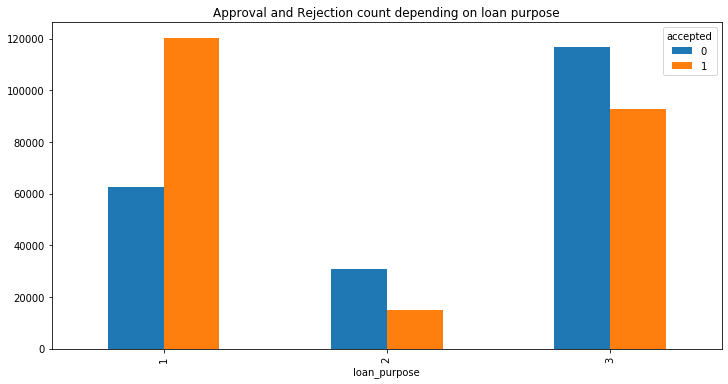

In [28]:
Loan_approval.groupby(['loan_purpose', 'accepted']).size().unstack().plot(kind='bar', figsize=(12,6), title='Approval and Rejection count depending on loan purpose')

From the discriptive analysis we can see frequency of '2' loan purpose is very low as compared to other '1' and '3'. And the graphical figure shows type '1' has highest acceptance rate.

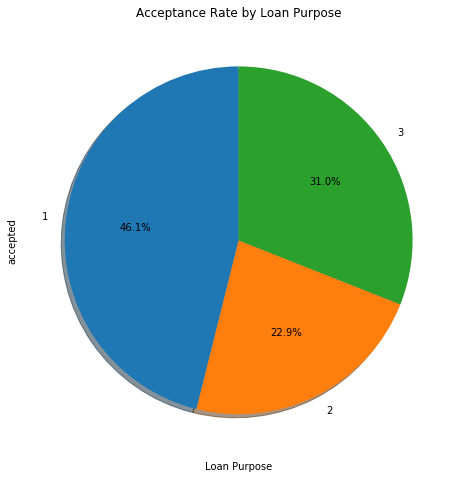

In [29]:
plt.figure(figsize=(12,6))
plt.title("Acceptance Rate by Loan Purpose")
plt.ylabel("Acceptance Rate")
plt.xlabel('Loan Purpose')
Loan_approval.groupby(['loan_purpose'])['accepted'].mean().plot.pie(figsize=(20,8), autopct='%1.1f%%',shadow=True, startangle=90)
plt.show()

In [30]:
#Loan Type
Loan_approval['loan_type'].unique()

array([3, 1, 2, 4])

In [31]:
#Checking frequencies of these categories
(Loan_approval['loan_type'].value_counts()/len(Loan_approval))

1    0.772997
2    0.146088
3    0.066377
4    0.014537
Name: loan_type, dtype: float64

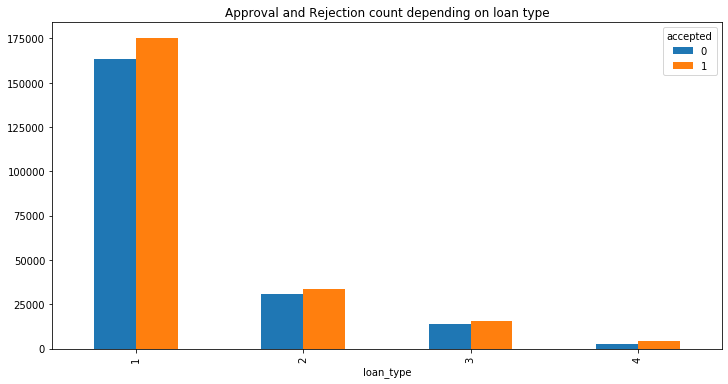

In [32]:
Loan_approval.groupby(['loan_type', 'accepted']).size().unstack().plot(kind='bar', figsize=(12,6), title='Approval and Rejection count depending on loan type')

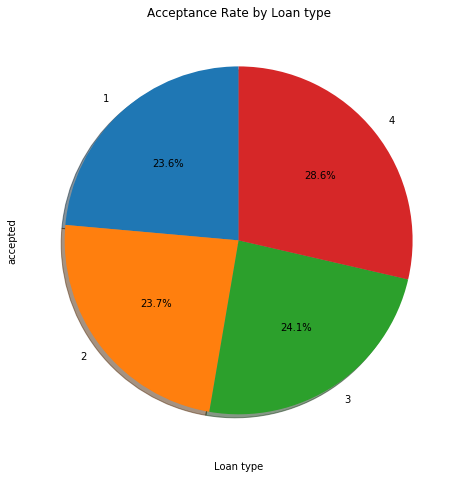

In [33]:
plt.figure(figsize=(12,6))
plt.title("Acceptance Rate by Loan type")
plt.ylabel("Acceptance Rate")
plt.xlabel('Loan type')
Loan_approval.groupby(['loan_type'])['accepted'].mean().plot.pie(figsize=(20,8), autopct='%1.1f%%',shadow=True, startangle=90)
plt.show()

From the pie chart, we can see the acceptance rate is highest for type 4 but frequency of this type is very low in dataset whereas type 1 has lowest acceptance rate as compared to other types but from the graph we can see that it has highest number of approvals.

In [34]:
#Preapproval
Loan_approval['preapproval'].unique()

array([3, 1, 2])

In [35]:
#Checking frequencies of these categories
(Loan_approval['preapproval'].value_counts()/len(Loan_approval))

3    0.839247
2    0.132888
1    0.027865
Name: preapproval, dtype: float64

We can see '3' has highest frequesncy

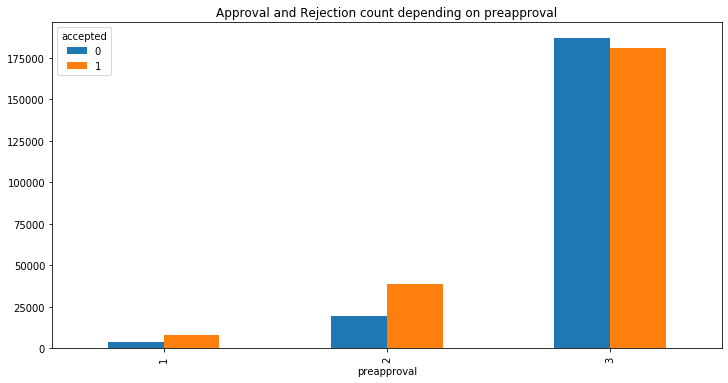

In [36]:
Loan_approval.groupby(['preapproval', 'accepted']).size().unstack().plot(kind='bar', figsize=(12,6), title='Approval and Rejection count depending on preapproval')

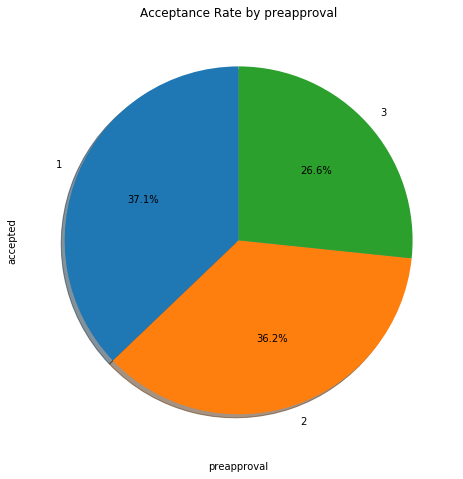

In [37]:
plt.figure(figsize=(12,6))
plt.title("Acceptance Rate by preapproval")
plt.ylabel("Acceptance Rate")
plt.xlabel('preapproval')
Loan_approval.groupby(['preapproval'])['accepted'].mean().plot.pie(figsize=(20,8), autopct='%1.1f%%',shadow=True, startangle=90)
plt.show()

we can notice from both the figures that even though '2' has highest acceptance rate, '3' has highest frequency of approvals.

In [38]:
#Property type
Loan_approval['property_type'].unique()

array([1, 2])

In [39]:
#Checking frequencies of these categories
(Loan_approval['property_type'].value_counts()/len(Loan_approval))

1    0.963311
2    0.036689
Name: property_type, dtype: float64

Property type '1' has highest frequency. making 95% of the data.

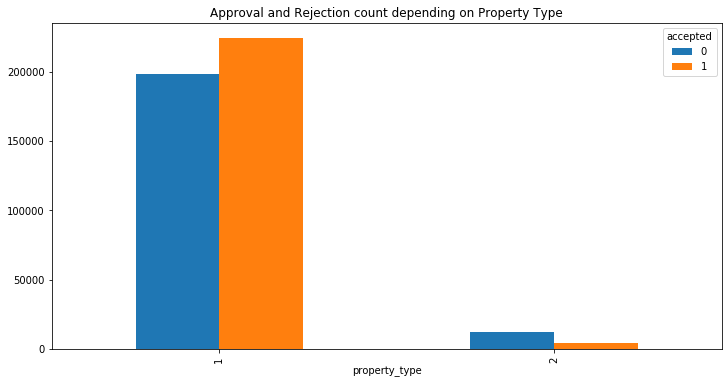

In [40]:
Loan_approval.groupby(['property_type', 'accepted']).size().unstack().plot(kind='bar', figsize=(12,6), title='Approval and Rejection count depending on Property Type')

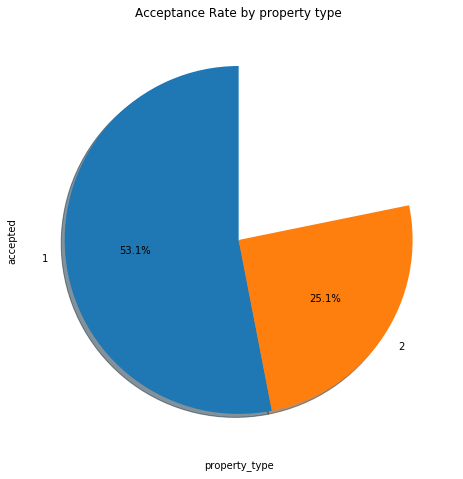

In [41]:
plt.figure(figsize=(12,6))
plt.title("Acceptance Rate by property type")
plt.ylabel("Acceptance Rate")
plt.xlabel('property_type')
Loan_approval.groupby(['property_type'])['accepted'].mean().plot.pie(figsize=(20,8), autopct='%1.1f%%',shadow=True, startangle=90)
plt.show()

Like 'preapproval' we can notice from both the figures that even though '3' has highest acceptance rate, '1' has highest frequency of approvals for property_type' column'. 

#### Applicant Features

In [42]:
#applicant_ethnicity
Loan_approval['applicant_ethnicity'].unique()

array([2, 1, 3, 4])

In [43]:
#Checking frequencies of these categories
(Loan_approval['applicant_ethnicity'].value_counts()/len(Loan_approval))

2    0.785810
3    0.112177
1    0.101539
4    0.000475
Name: applicant_ethnicity, dtype: float64

'2' applicant ethnicity forms maximum of data

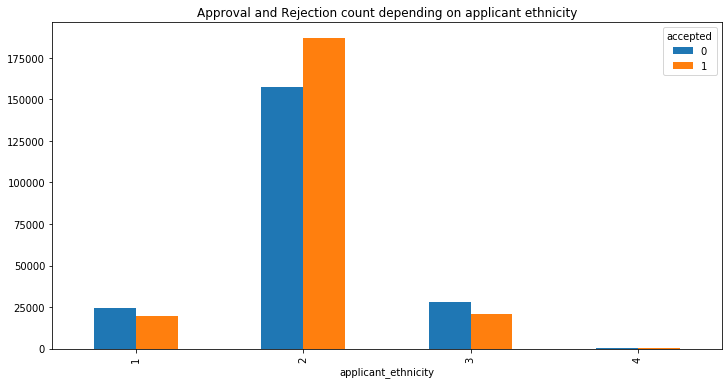

In [44]:
Loan_approval.groupby(['applicant_ethnicity', 'accepted']).size().unstack().plot(kind='bar', figsize=(12,6), title='Approval and Rejection count depending on applicant ethnicity')

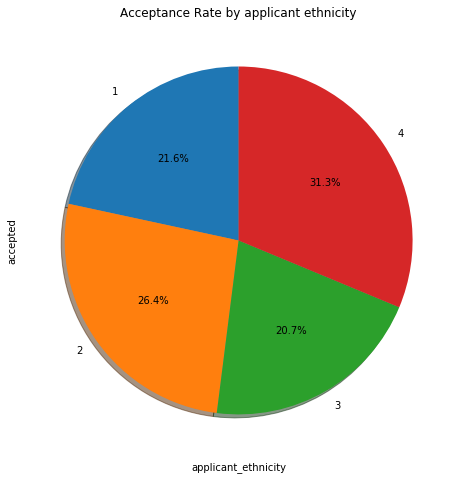

In [45]:
plt.figure(figsize=(12,6))
plt.title("Acceptance Rate by applicant ethnicity")
plt.ylabel("Acceptance Rate")
plt.xlabel('applicant_ethnicity')
Loan_approval.groupby(['applicant_ethnicity'])['accepted'].mean().plot.pie(figsize=(20,8), autopct='%1.1f%%',shadow=True, startangle=90)
plt.show()

Ethnicity with type '3' has highest acceptance rate of loans whereas '2' has highest total number of approvals

In [46]:
#applicant_race
Loan_approval['applicant_race'].unique()

array([5, 3, 6, 2, 1, 4, 7])

We can say people of 7 ethnicity has applied.

In [47]:
#Checking frequencies of these categories
(Loan_approval['applicant_race'].value_counts()/len(Loan_approval))

5    0.740001
6    0.117149
3    0.075805
2    0.053772
1    0.008468
4    0.004609
7    0.000196
Name: applicant_race, dtype: float64

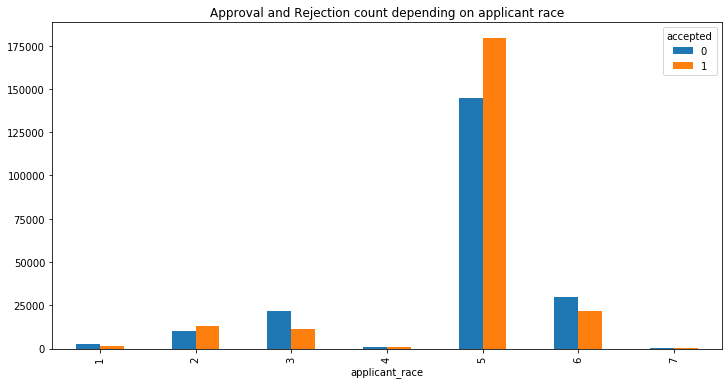

In [48]:
Loan_approval.groupby(['applicant_race', 'accepted']).size().unstack().plot(kind='bar', figsize=(12,6), title='Approval and Rejection count depending on applicant race')

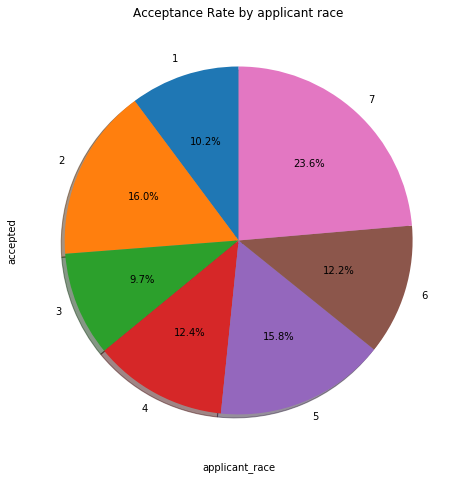

In [49]:
plt.figure(figsize=(12,6))
plt.title("Acceptance Rate by applicant race")
plt.ylabel("Acceptance Rate")
plt.xlabel('applicant_race')
Loan_approval.groupby(['applicant_race'])['accepted'].mean().plot.pie(figsize=(20,8), autopct='%1.1f%%',shadow=True, startangle=90)
plt.show()

In [50]:
#applicant_sex
Loan_approval['applicant_sex'].unique()

array([1, 2, 3, 4])

In [51]:
#Checking frequencies of these categories
(Loan_approval['applicant_sex'].value_counts()/len(Loan_approval))

1    0.640978
2    0.288318
3    0.070525
4    0.000178
Name: applicant_sex, dtype: float64

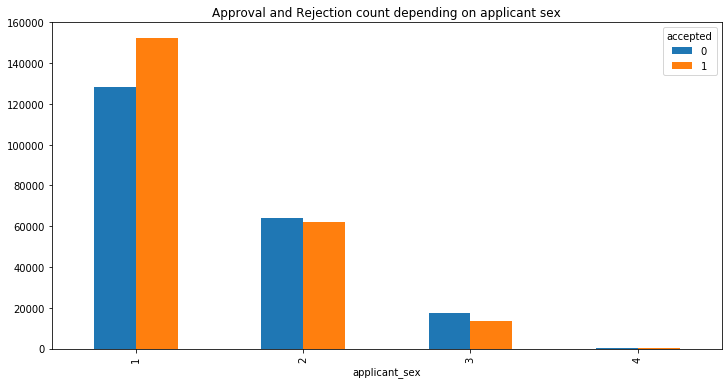

In [52]:
Loan_approval.groupby(['applicant_sex', 'accepted']).size().unstack().plot(kind='bar', figsize=(12,6), title='Approval and Rejection count depending on applicant sex')

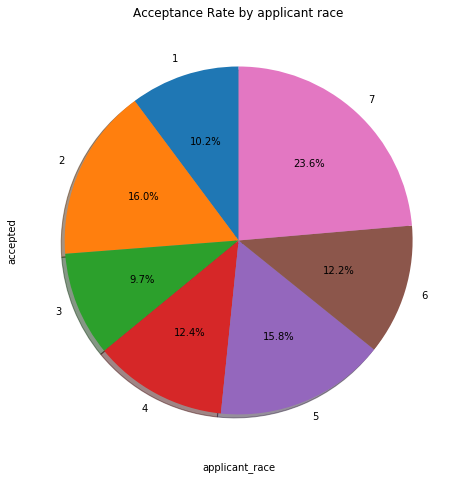

In [53]:
plt.figure(figsize=(12,6))
plt.title("Acceptance Rate by applicant race")
plt.ylabel("Acceptance Rate")
plt.xlabel('applicant_race')
Loan_approval.groupby(['applicant_race'])['accepted'].mean().plot.pie(figsize=(20,8), autopct='%1.1f%%',shadow=True, startangle=90)
plt.show()

In [54]:
#occupancy
Loan_approval['occupancy'].unique()

array([1, 2, 3])

In [55]:
#Checking frequencies of these categories
(Loan_approval['occupancy'].value_counts()/len(Loan_approval))

1    0.902593
2    0.096626
3    0.000780
Name: occupancy, dtype: float64

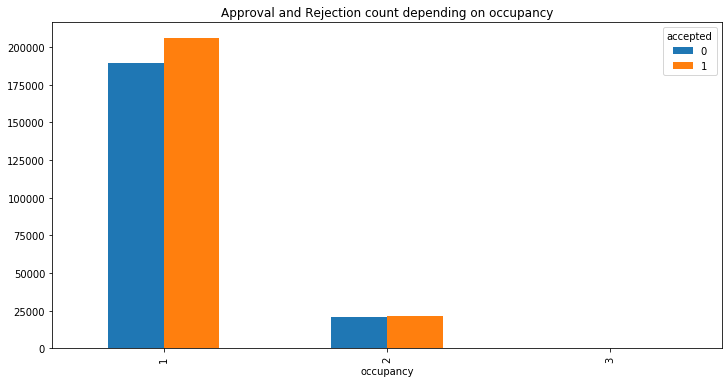

In [56]:
Loan_approval.groupby(['occupancy', 'accepted']).size().unstack().plot(kind='bar', figsize=(12,6), title='Approval and Rejection count depending on occupancy')

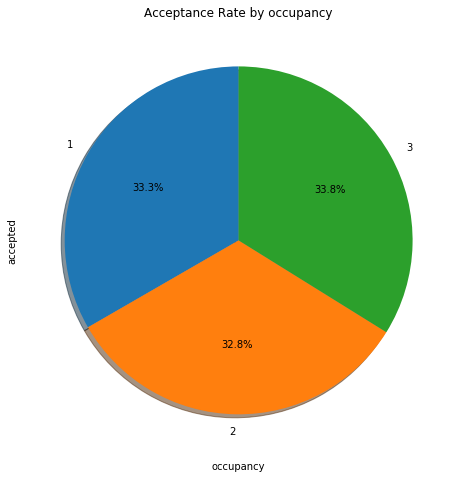

In [57]:
plt.figure(figsize=(12,6))
plt.title("Acceptance Rate by occupancy")
plt.ylabel("Acceptance Rate")
plt.xlabel('occupancy')
Loan_approval.groupby(['occupancy'])['accepted'].mean().plot.pie(figsize=(20,8), autopct='%1.1f%%',shadow=True, startangle=90)
plt.show()

<Figure size 864x432 with 0 Axes>

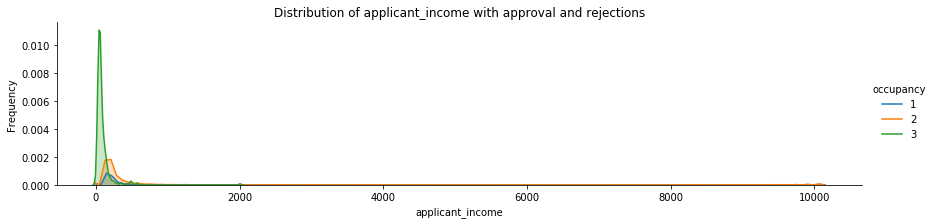

In [58]:
plt.figure(figsize=(12,6))
facet = sns.FacetGrid(Loan_approval,hue='occupancy',aspect=4)
facet.map(sns.kdeplot,'applicant_income',shade=True)
facet.add_legend()
plt.title("Distribution of applicant_income with approval and rejections")
plt.ylabel("Frequency")
plt.xlabel('applicant_income')
plt.show()

In [59]:
Loan_approval1 = Loan_approval[Loan_approval['applicant_income'] < 20000].sample(frac=.1).head()

In [60]:
Loan_approval

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted
0,0,3,1,1,1,70,3,18,37,246,...,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,False,1
1,1,1,1,3,1,178,3,369,52,299,...,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,False,0
2,2,2,1,3,1,163,3,16,10,306,...,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,False,1
3,3,1,1,1,1,155,1,305,47,180,...,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,True,1
4,4,1,1,1,1,305,3,24,37,20,...,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499994,499994,1,1,2,1,31,3,-1,37,156,...,147.0,3765.0,13.789,58049.0,100.000,1154.0,1955.0,5391,False,0
499996,499996,1,1,1,1,140,3,74,47,98,...,216.0,3452.0,6.887,86307.0,100.000,1423.0,1944.0,5359,True,0
499997,499997,1,2,1,1,22,3,-1,46,131,...,35.0,2925.0,36.046,47826.0,100.000,1062.0,1762.0,2318,False,0
499998,499998,1,1,2,1,35,3,367,6,149,...,41.0,3442.0,98.879,60327.0,62.803,618.0,1297.0,5339,False,0


In [61]:
#applicant_income

<Figure size 864x432 with 0 Axes>

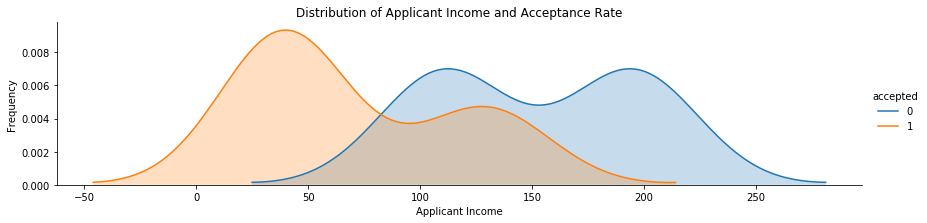

In [62]:
plt.figure(figsize=(12,6))
facet = sns.FacetGrid(Loan_approval1,hue='accepted',aspect=4)
facet.map(sns.kdeplot,'applicant_income',shade=True)
facet.add_legend()
plt.title("Distribution of Applicant Income and Acceptance Rate")
plt.ylabel("Frequency")
plt.xlabel('Applicant Income')
plt.show()

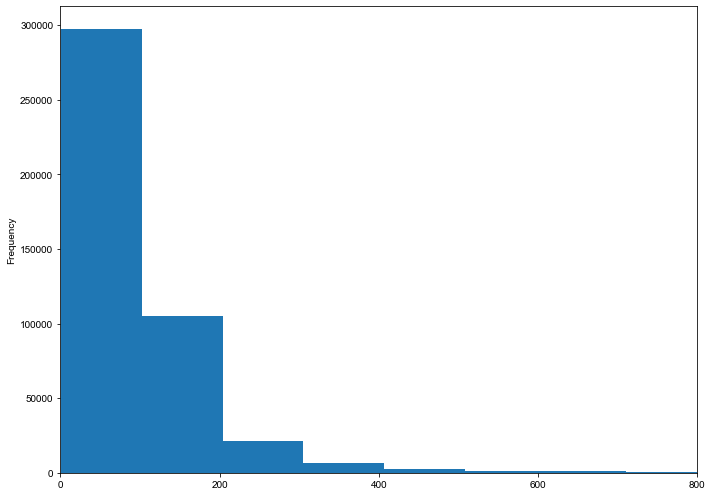

In [63]:
plt.figure(figsize=(10,7))
Loan_approval['applicant_income'].plot.hist(bins=100)
plt.xlim([0,400])
plt.xticks(np.arange(0, 1000, step=200))
sns.set_style('darkgrid')
plt.tight_layout()

In [64]:
#ffiecmedian_family_income

<Figure size 864x432 with 0 Axes>

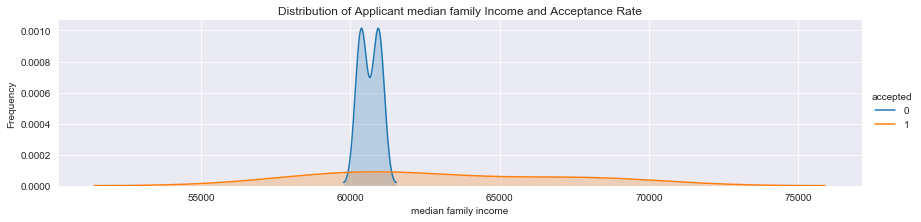

In [65]:
plt.figure(figsize=(12,6))
facet = sns.FacetGrid(Loan_approval1,hue='accepted',aspect=4)
facet.map(sns.kdeplot,'ffiecmedian_family_income',shade=True)
facet.add_legend()
plt.title("Distribution of Applicant median family Income and Acceptance Rate")
plt.ylabel("Frequency")
plt.xlabel('median family income')
plt.show()

Let's check if applicant features are related to loan features

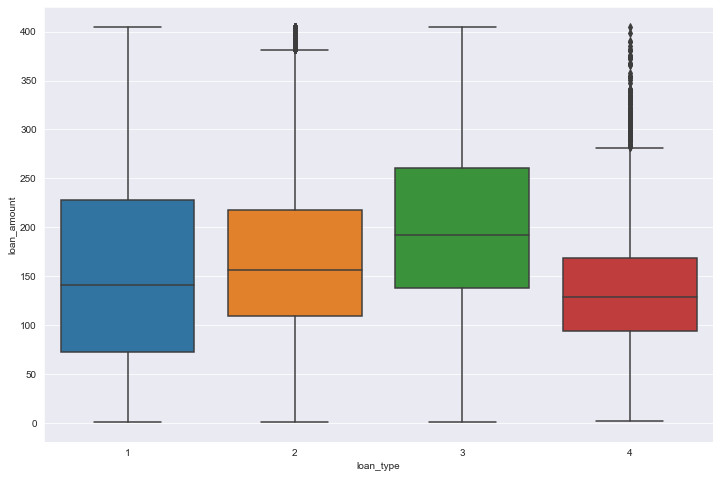

In [66]:
plt.figure(figsize=(12,8))
sns.boxplot(x='loan_type',y='loan_amount',data=Loan_approval[Loan_approval['loan_amount']<Loan_approval['loan_amount'].quantile(.90)])

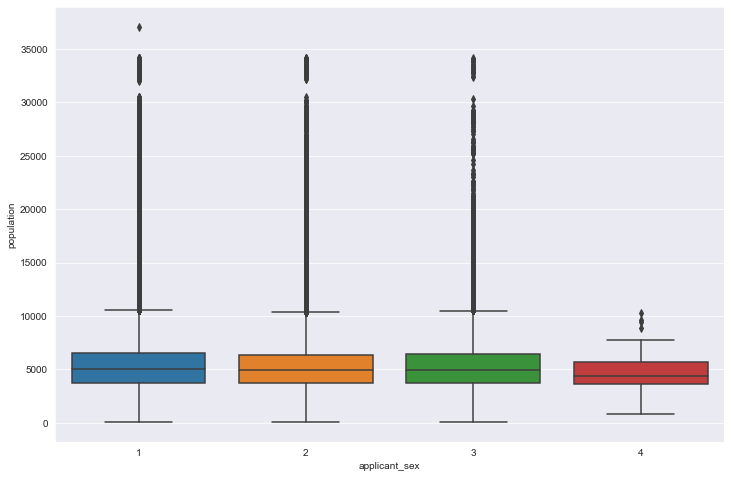

In [67]:
plt.figure(figsize=(12,8))
sns.boxplot(x='applicant_sex',y='population',data=Loan_approval)

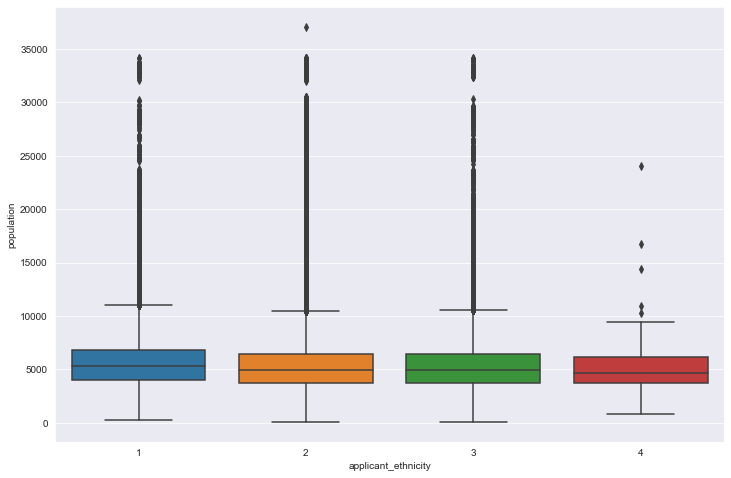

In [68]:
plt.figure(figsize=(12,8))
sns.boxplot(x='applicant_ethnicity',y='population',data=Loan_approval)

<Figure size 864x432 with 0 Axes>

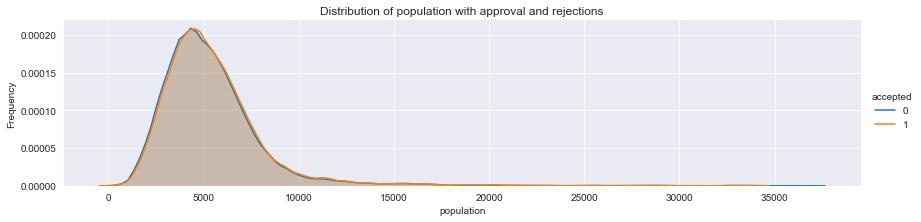

In [69]:
plt.figure(figsize=(12,6))
facet = sns.FacetGrid(Loan_approval,hue='accepted',aspect=4)
facet.map(sns.kdeplot,'population',shade=True)
facet.add_legend()
plt.title("Distribution of population with approval and rejections")
plt.ylabel("Frequency")
plt.xlabel('population')
plt.show()

<Figure size 864x432 with 0 Axes>

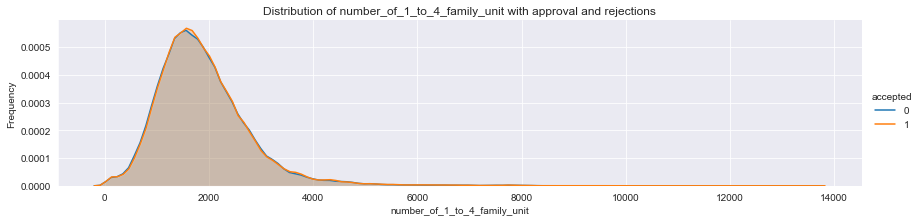

In [70]:
plt.figure(figsize=(12,6))
facet = sns.FacetGrid(Loan_approval,hue='accepted',aspect=4)
facet.map(sns.kdeplot,'number_of_1_to_4_family_units',shade=True)
facet.add_legend()
plt.title("Distribution of number_of_1_to_4_family_unit with approval and rejections")
plt.ylabel("Frequency")
plt.xlabel('number_of_1_to_4_family_unit')
plt.show()


<Figure size 864x432 with 0 Axes>

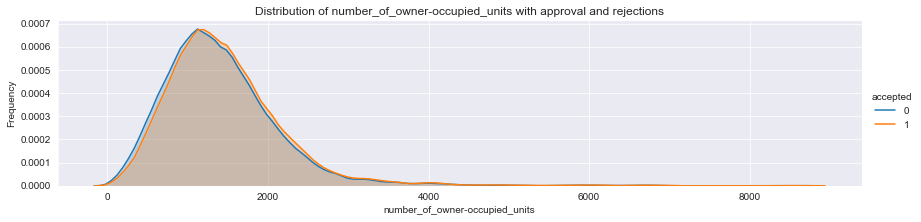

In [71]:
plt.figure(figsize=(12,6))
facet = sns.FacetGrid(Loan_approval,hue='accepted',aspect=4)
facet.map(sns.kdeplot,'number_of_owner-occupied_units',shade=True)
facet.add_legend()
plt.title("Distribution of number_of_owner-occupied_units with approval and rejections")
plt.ylabel("Frequency")
plt.xlabel('number_of_owner-occupied_units')
plt.show()

## Predictive Modelling

In [72]:
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [73]:
cols= ['loan_type','loan_purpose','property_type','occupancy','preapproval','applicant_ethnicity','applicant_race','applicant_sex','accepted']

df = pd.get_dummies(Loan_approval,columns=cols,drop_first=True)

In [74]:
df.head()

,row_id,loan_amount,msa_md,state_code,county_code,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,...,applicant_race_2,applicant_race_3,applicant_race_4,applicant_race_5,applicant_race_6,applicant_race_7,applicant_sex_2,applicant_sex_3,applicant_sex_4,accepted_1
0,0,70,18,37,246,24.0,6203.0,44.230,60588.0,50.933,...,0,0,0,1,0,0,0,0,0,1
1,1,178,369,52,299,57.0,5774.0,15.905,54821.0,100.000,...,0,0,0,1,0,0,0,0,0,0
2,2,163,16,10,306,67.0,6094.0,61.270,67719.0,100.000,...,0,0,0,1,0,0,0,0,0,1
3,3,155,305,47,180,105.0,6667.0,6.246,78439.0,100.000,...,0,0,0,1,0,0,0,0,0,1
4,4,305,24,37,20,71.0,6732.0,100.000,63075.0,82.200,...,0,1,0,0,0,0,1,0,0,1


In [75]:
Loan_approval.columns

Index(['row_id', 'loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex',
       'applicant_income', 'population', 'minority_population_pct',
       'ffiecmedian_family_income', 'tract_to_msa_md_income_pct',
       'number_of_owner-occupied_units', 'number_of_1_to_4_family_units',
       'lender', 'co_applicant', 'accepted'],
      dtype='object')

In [76]:
df = Loan_approval.iloc[:,[1,2,3,4,6,10,11,12,22]]

In [77]:
#Create target and feature variables
X = df.drop(['accepted'],axis=1)
Y = df['accepted']

In [78]:
# split data into training and testing set
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.2, random_state = 100, shuffle = False)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(350604, 8)
(87651, 8)
(350604,)
(87651,)


In [79]:
forest = RandomForestClassifier()
forest.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [80]:
y_predict = forest.predict(X_test)

In [81]:
print(classification_report(Y_test,y_predict))

              precision    recall  f1-score   support

           0       0.63      0.57      0.60     41977
           1       0.64      0.69      0.66     45674

    accuracy                           0.63     87651
   macro avg       0.63      0.63      0.63     87651
weighted avg       0.63      0.63      0.63     87651



In [82]:
accuracy_score(Y_test, y_predict)

0.632759466520633

In [83]:
pd.DataFrame(confusion_matrix(Y_test,y_predict), columns =['Predicted Not Accepted','Predicted Accepted'], index = ['Actual Not Accepted','Actual Accepted'])

,Predicted Not Accepted,Predicted Accepted
Actual Not Accepted,24036,17941
Actual Accepted,14248,31426


In [84]:
pos_prob = forest.predict_proba(X_test)[:,1]
roc_auc_score(Y_test,pos_prob)

0.6838139500654596

In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
parameters = {'max_depth' : [5,10,20,50,100,None]}

In [87]:
forest = RandomForestClassifier()

In [88]:
grid_search = GridSearchCV(forest,parameters)

In [89]:
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [90]:
randomforest_best = grid_search.best_estimator_
pos_prob = randomforest_best.predict_proba(X_test)[:,1]
roc_auc_score(Y_test,pos_prob)

0.6837811946843668

In [91]:
y_predict = randomforest_best.predict(X_test)
accuracy_score(Y_test,y_predict)

0.6326681954569828

In [92]:
pd.DataFrame(confusion_matrix(Y_test,y_predict), columns =['Predicted Not Accepted','Predicted Accepted'], index = ['Actual Not Accepted','Actual Accepted'])

,Predicted Not Accepted,Predicted Accepted
Actual Not Accepted,24038,17939
Actual Accepted,14258,31416


Following conclusions can be drawn from the confusion matrix:
- The model has correctly identified **26098 accepted cases**.
- The model has incorrectly identified **17280 not accepted cases as accepted**.
- The model has incorrectly identified **23969 accepted cases as not accepted**.
- The model has correctly identified **32653 not accepted cases**.

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)

In [ ]:
y_predict_knn = knn.predict(X_test)

In [ ]:
print(classification_report(Y_test,y_predict_knn))

In [ ]:
accuracy_score(Y_test, y_predict_knn)

In [ ]:
pos_prob = knn.predict_proba(X_test)[:,1]
roc_auc_score(Y_test,pos_prob)

In [ ]:
pd.DataFrame(confusion_matrix(Y_test,y_predict), columns =['Predicted Not Accepted','Predicted Accepted'], index = ['Actual Not Accepted','Actual Accepted'])

Following conclusions can be drawn from the confusion matrix:
- The model has correctly identified **31338 accepted cases**.
- The model has incorrectly identified **18606 not accepted cases as accepted**.
- The model has incorrectly identified **18729 accepted cases as not accepted**.
- The model has correctly identified **31327 not accepted cases**.

In [ ]:
from imblearn.metrics import sensitivity_specificity_support
sensitivity_specificity_support(Y_test, y_predict, average='macro')

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# instantiate the model 
model = LogisticRegression()

In [ ]:
# fit the model with data
model.fit(X_train, Y_train)

In [ ]:
y_LR_predict = model.predict(X_test)

In [ ]:
print(classification_report(Y_test,y_LR_predict))

In [ ]:
sensitivity_specificity_support(Y_test, y_LR_predict, average='macro')

In [ ]:
accuracy_score(Y_test, y_LR_predict)

In [ ]:
pd.DataFrame(confusion_matrix(Y_test,y_predict), columns =['Predicted Not clicked','Predicted Clicked'], index = ['Actual Not clicked','Actual clicked'])

Following conclusions can be drawn from the confusion matrix:
- The model has correctly identified **26098 accepted cases**.
- The model has incorrectly identified **17280 not accepted cases as accepted**.
- The model has incorrectly identified **23969 accepted cases as not accepted**.
- The model has correctly identified **32653 not accepted cases**.